In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")

In [3]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


## Understanding the data

In [4]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [5]:
data.shape

(35064, 18)

In [6]:
data.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969533,0.043181,1.776442e-02,6.838683e-04,-0.039594,-0.026991,-0.189954,-0.018114,0.048346,-0.053348,-0.133881,0.169126,-0.080457,0.004272,0.061228
year,0.969533,1.000000,-0.202010,-5.569082e-03,0.000000e+00,-0.033421,-0.008573,-0.146996,-0.029711,0.041675,-0.017386,-0.163572,0.163718,-0.143997,-0.000291,0.088673
month,0.043181,-0.202010,1.000000,1.052232e-02,0.000000e+00,-0.022848,-0.074980,-0.159878,0.047997,0.025557,-0.140972,0.133704,0.003645,0.266637,0.018445,-0.115960
day,0.017764,-0.005569,0.010522,1.000000e+00,-5.202774e-18,0.007267,0.021414,-0.019474,-0.004036,-0.024577,0.004446,0.012328,0.028088,0.026524,0.000705,-0.019489
hour,0.000684,0.000000,0.000000,-5.202774e-18,1.000000e+00,0.040041,0.081132,0.068560,0.070265,0.019857,0.253878,0.141271,-0.041782,-0.000289,0.025811,0.111874
PM2.5,-0.039594,-0.033421,-0.022848,7.267191e-03,4.004147e-02,1.000000,0.868127,0.475117,0.718170,0.802737,-0.100542,-0.089939,-0.008005,0.134558,-0.009221,-0.255714
PM10,-0.026991,-0.008573,-0.074980,2.141405e-02,8.113219e-02,0.868127,1.000000,0.450585,0.653864,0.685482,-0.018229,-0.055309,-0.038691,0.061941,-0.023223,-0.126962
SO2,-0.189954,-0.146996,-0.159878,-1.947392e-02,6.855974e-02,0.475117,0.450585,1.000000,0.610433,0.529182,-0.182096,-0.312980,0.245297,-0.284595,-0.040201,-0.092249
NO2,-0.018114,-0.029711,0.047997,-4.035611e-03,7.026507e-02,0.718170,0.653864,0.610433,1.000000,0.798753,-0.373625,-0.316337,0.200609,-0.109579,-0.032778,-0.302927
CO,0.048346,0.041675,0.025557,-2.457723e-02,1.985652e-02,0.802737,0.685482,0.529182,0.798753,1.000000,-0.303275,-0.282312,0.172220,-0.031765,-0.004138,-0.269783


## Missing value treatment

In [7]:
data['PM2.5'] = data['PM2.5'].fillna(data.groupby('month')['PM2.5'].transform('mean'))
data['PM10'] = data['PM10'].fillna(data.groupby('month')['PM10'].transform('mean'))
data['SO2'] = data['SO2'].fillna(data.groupby('month')['SO2'].transform('mean'))
data['NO2'] = data['NO2'].fillna(data.groupby('month')['NO2'].transform('mean'))
data['CO'] = data['CO'].fillna(data.groupby('month')['CO'].transform('mean'))
data['O3'] = data['O3'].fillna(data.groupby('month')['O3'].transform('mean'))
data['TEMP'] = data['TEMP'].fillna(data.groupby('month')['TEMP'].transform('mean'))
data['PRES'] = data['PRES'].fillna(data.groupby('month')['PRES'].transform('mean'))
data['DEWP'] = data['DEWP'].fillna(data.groupby('month')['DEWP'].transform('mean'))
data['RAIN'] = data['RAIN'].fillna(data.groupby('month')['RAIN'].transform('mean'))
data['WSPM'] = data['WSPM'].fillna(data.groupby('month')['WSPM'].transform('mean'))

In [8]:
data.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

In [9]:
data['wd'].value_counts()

NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

In [10]:
data['wd']=data.groupby('month').wd.transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
data.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [12]:
data['wd'].value_counts()

NNW    4874
NW     3865
N      3777
WNW    2892
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

## Outliers treatment

In [13]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(exclude=np.number)

In [14]:
num_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.021384,83.726872,11.736559,27.575554,906.128410,68.868946,13.670127,1007.771809,1.487129,0.060308,1.854148
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.484802,78.824848,15.387405,25.985914,878.915741,53.098976,11.367474,10.224195,13.824501,0.752355,1.309066
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.182299,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,42.000000,61.000000,5.000000,19.000000,627.330819,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,15.000000,38.000000,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


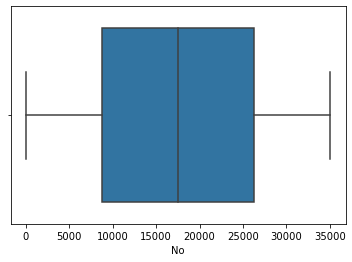

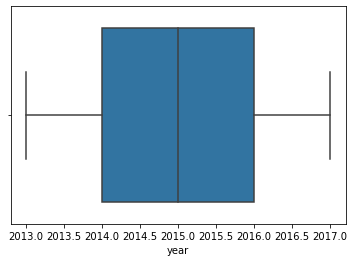

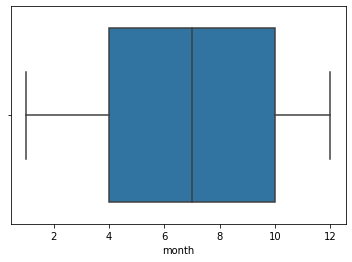

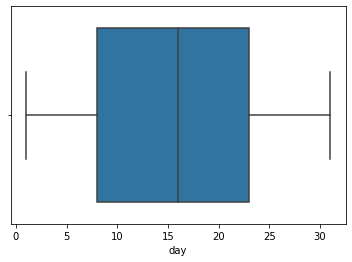

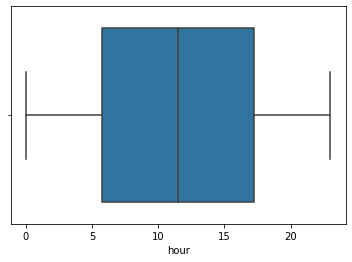

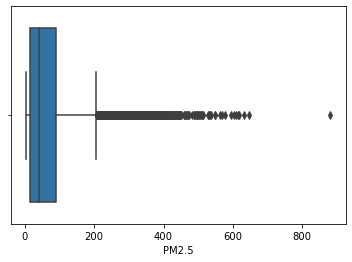

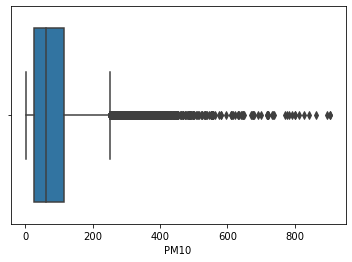

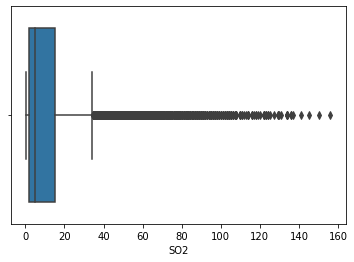

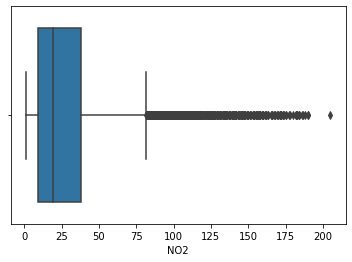

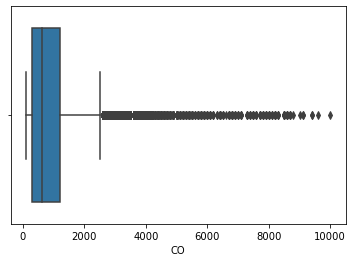

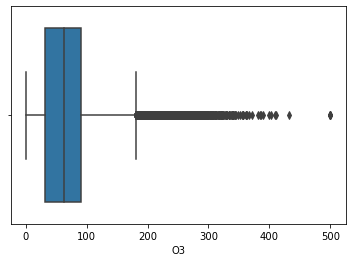

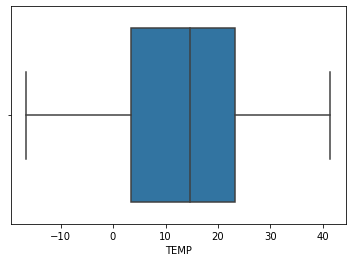

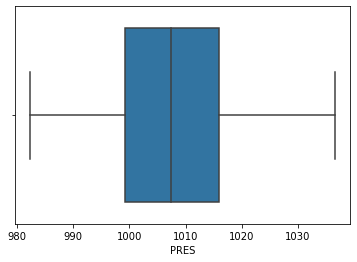

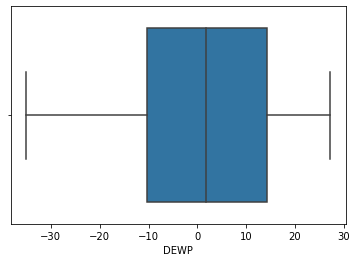

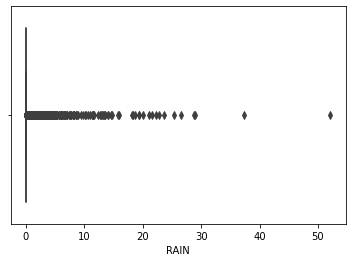

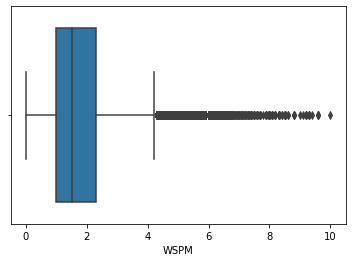

In [15]:
for i in num_data.columns:
    sb.boxplot(num_data[i])
    plt.show()

In [16]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 3*iqr
    lb = q1 - 3*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i], num_data[i].quantile(0.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i], num_data[i].quantile(0.01))

<ipython-input-16-78e144556025>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i], num_data[i].quantile(0.99))
<ipython-input-16-78e144556025>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i], num_data[i].quantile(0.01))


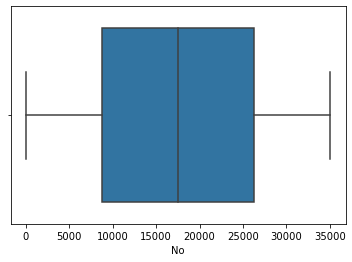

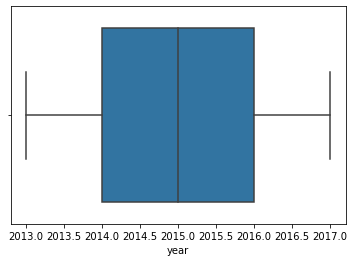

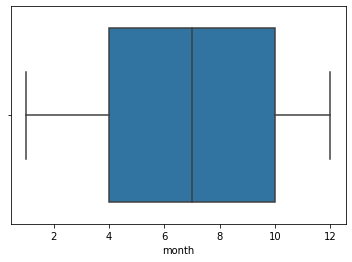

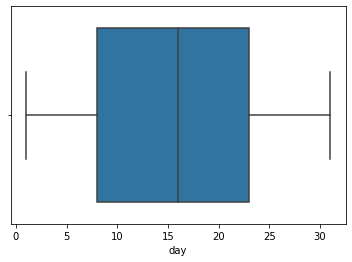

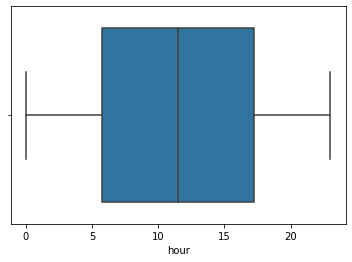

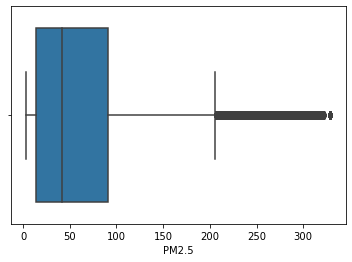

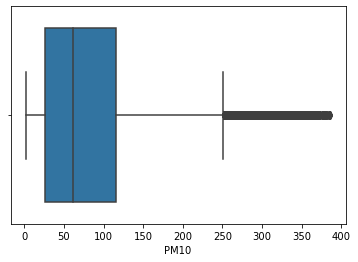

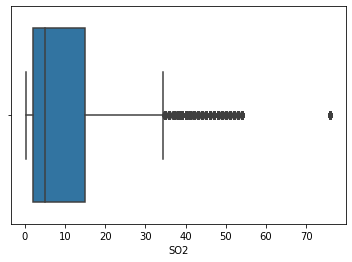

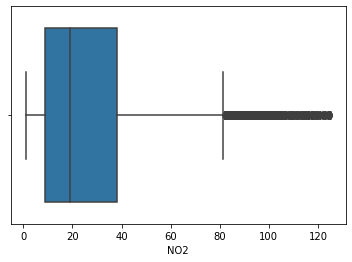

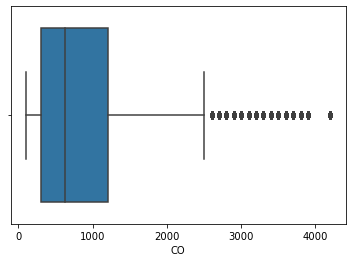

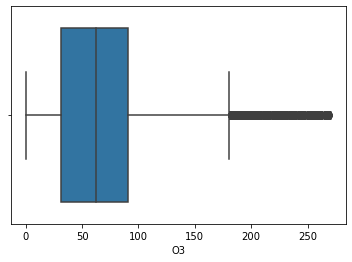

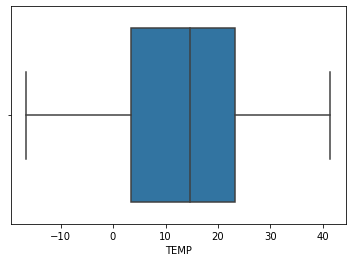

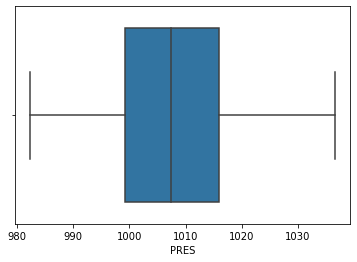

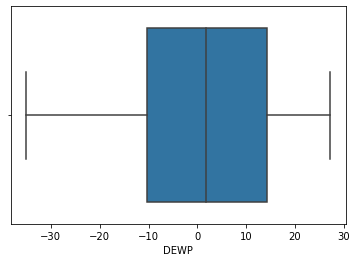

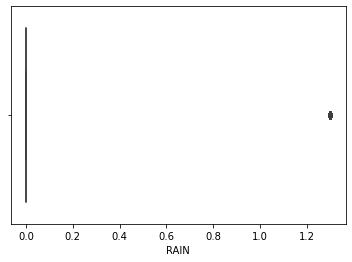

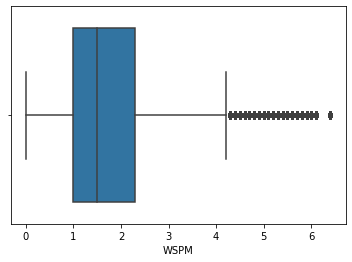

In [17]:
for i in num_data.columns:
    sb.boxplot(num_data[i])
    plt.show()

In [18]:
num_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.422052,82.816736,11.799527,27.378375,892.091221,68.528102,13.670127,1007.771809,1.487129,0.051942,1.847078
std,10122.249256,1.177213,3.448752,8.800218,6.922285,68.668564,74.137211,15.366619,25.149346,800.130853,51.601301,11.367474,10.224195,13.824501,0.254615,1.279954
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.182299,3.400000,999.300000,-10.300000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,42.000000,61.000000,5.000000,19.000000,627.330819,62.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,15.000000,38.000000,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,329.000000,386.000000,76.000000,125.000000,4200.000000,270.000000,41.400000,1036.500000,27.200000,1.300000,6.400000


## Encoding

In [19]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,34.306504,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,34.306504,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,34.306504,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,34.306504,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [20]:
encoded_type = pd.get_dummies(data=data['wd'], drop_first=True, prefix= 'wd')
data1 = pd.concat([data, encoded_type], axis=1)
data1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,4.0,4.0,3.0,34.306504,200.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013,3,1,1,7.0,7.0,3.0,34.306504,200.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013,3,1,3,6.0,6.0,3.0,34.306504,200.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013,3,1,4,5.0,5.0,3.0,34.306504,200.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.000000,200.0,...,0,0,0,0,0,0,0,0,0,0
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.000000,200.0,...,0,0,0,0,0,0,0,0,0,0
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.000000,200.0,...,0,0,0,0,0,0,0,0,0,0
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.000000,200.0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
inp = data1.drop(['PM2.5','station','No','wd'],1)
out = pd.DataFrame(data1['PM2.5'])

In [22]:
import statsmodels.api as sm
inp1 = sm.add_constant(inp)
ols= sm.OLS(out,inp1)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     6753.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:02:23   Log-Likelihood:            -1.6640e+05
No. Observations:               35064   AIC:                         3.329e+05
Df Residuals:                   35034   BIC:                         3.331e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3596.9776    276.151     13.025      0.000    3055.713    4138.243
year          -2.0125      0.138    -14.603      0.000      -2.283      -1.742
month         -0.9166      0.051    -17.815      0.000      -1.017      -0.816
day           -0.0392      0.017     -2.305      0.021      -0.073      -0.006
hour          -0.0931      0.023     -3.996      0.000      -0.139      -0.047
PM10           0.5161      0.003    178.367      0.000       0.510       0.522
SO2            0.1428      0.014     10.396      0.000       0.116       0.170
NO2            0.3033      0.011     27.524      0.000       0.282       0.325
CO             0.0226      0.000     74.574      0.000       0.022       0.023
O3             0.1018      0.004     24.421      0.000       0.094       0.110
TEMP          -1.0464      0.038    -27.461      0.000      -1.121      -0.972
PRES           0.4595      0.030     15.356      0.000       0.401       0.518
DEWP           1.5732      0.027     57.993      0.000       1.520       1.626
RAIN          -0.8200      0.201     -4.087      0.000      -1.213      -0.427
WSPM          -0.5583      0.152     -3.672      0.000      -0.856      -0.260
wd_ENE        -1.7761      0.961     -1.849      0.065      -3.659       0.107
wd_ESE        -0.9779      0.776     -1.260      0.208      -2.499       0.543
wd_N           1.4134      0.737      1.917      0.055      -0.032       2.858
wd_NE          0.9624      0.889      1.083      0.279      -0.779       2.704
wd_NNE        -0.8560      0.863     -0.992      0.321      -2.548       0.836
wd_NNW         2.0172      0.707      2.854      0.004       0.632       3.403
wd_NW          2.6817      0.742      3.612      0.000       1.226       4.137
wd_S          -1.6276      0.890     -1.829      0.067      -3.371       0.116
wd_SE         -2.4653      0.869     -2.836      0.005      -4.169      -0.761
wd_SSE        -1.6822      0.874     -1.924      0.054      -3.395       0.031
wd_SSW        -1.9401      1.008     -1.924      0.054      -3.916       0.036
wd_SW         -0.7446      1.100     -0.677      0.499      -2.901       1.412
wd_W           2.2168      0.951      2.330      0.020       0.352       4.081
wd_WNW         2.3437      0.815      2.874      0.004       0.745       3.942
wd_WSW         0.2874      1.198      0.240      0.810      -2.062       2.636
==============================================================================
Omnibus:                    10809.945   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1899701.513
Skew:                          -0.216   Prob(JB):                         0.00
Kurtosis:                      39.057   Cond. No.                     4.56e+06
==============================================================================

W

## Assumptions

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['FEATURE'] = inp.columns
vif.sort_values('VIF', ascending=False)

,VIF,FEATURE
0,41538.092150,year
10,41090.789232,PRES
9,20.456228,TEMP
6,7.876901,NO2
7,6.519783,CO
11,6.418696,DEWP
1,6.234163,month
8,5.919180,O3
13,5.363897,WSPM
4,5.000709,PM10


In [24]:
data1.corr()['PM2.5']

No       -0.038377
year     -0.032450
month    -0.022246
day       0.006968
hour      0.039501
PM2.5     1.000000
PM10      0.863407
SO2       0.473232
NO2       0.709199
CO        0.781098
O3       -0.102342
TEMP     -0.090742
PRES     -0.005849
DEWP      0.131919
RAIN     -0.009425
WSPM     -0.252393
wd_ENE    0.031649
wd_ESE    0.121631
wd_N     -0.040093
wd_NE    -0.026988
wd_NNE   -0.040205
wd_NNW   -0.015655
wd_NW    -0.061886
wd_S      0.019695
wd_SE     0.060858
wd_SSE    0.044941
wd_SSW    0.017349
wd_SW     0.009575
wd_W     -0.046418
wd_WNW   -0.114727
wd_WSW    0.001732
Name: PM2.5, dtype: float64

In [25]:
inp = data1.drop(['PM2.5','station','No','wd','year','PRES'],1)

In [26]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['FEATURE'] = inp.columns
vif.sort_values('VIF', ascending=False)

,VIF,FEATURE
8,14.374554,TEMP
5,7.661034,NO2
6,6.312570,CO
7,5.774237,O3
9,5.738271,DEWP
11,5.265895,WSPM
3,4.969124,PM10
0,4.894851,month
2,4.314795,hour
1,3.808087,day


In [27]:
inp1 = sm.add_constant(inp)
ols= sm.OLS(out,inp1)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     7156.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:02:33   Log-Likelihood:            -1.6660e+05
No. Observations:               35064   AIC:                         3.333e+05
Df Residuals:                   35036   BIC:                         3.335e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8800      0.910      7.564      0.000       5.097       8.663
month         -0.5299      0.048    -11.051      0.000      -0.624      -0.436
day           -0.0157      0.017     -0.918      0.359      -0.049       0.018
hour          -0.0721      0.023     -3.090      0.002      -0.118      -0.026
PM10           0.5132      0.003    176.909      0.000       0.508       0.519
SO2            0.1974      0.013     14.788      0.000       0.171       0.224
NO2            0.2867      0.011     25.963      0.000       0.265       0.308
CO             0.0224      0.000     74.040      0.000       0.022       0.023
O3             0.0985      0.004     23.538      0.000       0.090       0.107
TEMP          -1.2644      0.034    -37.684      0.000      -1.330      -1.199
DEWP           1.4667      0.027     55.199      0.000       1.415       1.519
RAIN          -0.9077      0.202     -4.501      0.000      -1.303      -0.512
WSPM          -0.6729      0.153     -4.407      0.000      -0.972      -0.374
wd_ENE        -2.2812      0.966     -2.362      0.018      -4.175      -0.388
wd_ESE        -0.9041      0.780     -1.159      0.246      -2.433       0.625
wd_N           0.5715      0.740      0.772      0.440      -0.879       2.022
wd_NE          0.0697      0.893      0.078      0.938      -1.680       1.819
wd_NNE        -1.6433      0.867     -1.895      0.058      -3.343       0.056
wd_NNW         1.0627      0.709      1.498      0.134      -0.327       2.453
wd_NW          1.5311      0.744      2.057      0.040       0.072       2.990
wd_S          -1.9976      0.893     -2.236      0.025      -3.749      -0.247
wd_SE         -2.6291      0.873     -3.012      0.003      -4.340      -0.918
wd_SSE        -1.9253      0.876     -2.197      0.028      -3.643      -0.207
wd_SSW        -2.1569      1.014     -2.128      0.033      -4.144      -0.170
wd_SW         -1.4903      1.106     -1.348      0.178      -3.658       0.677
wd_W           1.0834      0.955      1.135      0.257      -0.788       2.955
wd_WNW         1.2155      0.818      1.486      0.137      -0.388       2.819
wd_WSW        -0.6348      1.204     -0.527      0.598      -2.996       1.726
==============================================================================
Omnibus:                    10556.421   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1679715.297
Skew:                          -0.195   Prob(JB):                         0.00
Kurtosis:                      36.905   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might i

In [28]:
ols_mod.resid

0         0.012883
1         2.878672
2        11.688178
3         0.954267
4        -0.565781
           ...    
35059    22.962305
35060    22.149567
35061    13.969365
35062    12.797469
35063     6.665072
Length: 35064, dtype: float64

In [29]:
ols_mod.resid.skew()

-0.19526967609079648

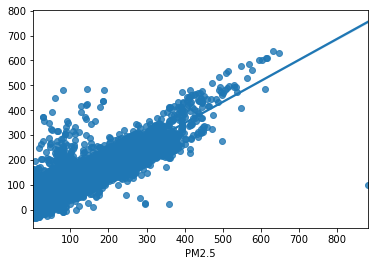

In [30]:
sb.regplot(out,ols_mod.predict())

In [31]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(res=ols_mod,frac=0.5)

(0.9201248267430175, 0.999999981876182)

In [32]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)

(0.7568538826582454, 0.9999999999999999, 'increasing')

## Feature Engineering

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
lr = LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod = rfe.fit(inp1,out)
rfe_mod.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [39]:
ols_mod.pvalues.idxmax()

'wd_NE'

In [44]:
inp=inp.drop('wd_NE',axis=1)

In [45]:
inp1 = sm.add_constant(inp)
ols= sm.OLS(out,inp1)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     7432.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:07:27   Log-Likelihood:            -1.6660e+05
No. Observations:               35064   AIC:                         3.333e+05
Df Residuals:                   35037   BIC:                         3.335e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9123      0.810      8.535      0.000       5.325       8.500
month         -0.5299      0.048    -11.051      0.000      -0.624      -0.436
day           -0.0157      0.017     -0.918      0.359      -0.049       0.018
hour          -0.0721      0.023     -3.090      0.002      -0.118      -0.026
PM10           0.5132      0.003    176.937      0.000       0.507       0.519
SO2            0.1974      0.013     14.797      0.000       0.171       0.223
NO2            0.2866      0.011     25.968      0.000       0.265       0.308
CO             0.0224      0.000     74.042      0.000       0.022       0.023
O3             0.0985      0.004     23.539      0.000       0.090       0.107
TEMP          -1.2644      0.034    -37.686      0.000      -1.330      -1.199
DEWP           1.4666      0.027     55.273      0.000       1.415       1.519
RAIN          -0.9075      0.202     -4.500      0.000      -1.303      -0.512
WSPM          -0.6737      0.152     -4.423      0.000      -0.972      -0.375
wd_ENE        -2.3104      0.891     -2.594      0.009      -4.056      -0.565
wd_ESE        -0.9319      0.694     -1.343      0.179      -2.292       0.428
wd_N           0.5419      0.635      0.853      0.394      -0.703       1.787
wd_NNE        -1.6731      0.778     -2.150      0.032      -3.199      -0.148
wd_NNW         1.0333      0.601      1.721      0.085      -0.144       2.210
wd_NW          1.5015      0.641      2.343      0.019       0.245       2.758
wd_S          -2.0256      0.818     -2.476      0.013      -3.629      -0.422
wd_SE         -2.6571      0.796     -3.339      0.001      -4.217      -1.097
wd_SSE        -1.9530      0.801     -2.437      0.015      -3.524      -0.382
wd_SSW        -2.1854      0.946     -2.310      0.021      -4.040      -0.331
wd_SW         -1.5192      1.042     -1.458      0.145      -3.561       0.523
wd_W           1.0543      0.879      1.199      0.230      -0.669       2.777
wd_WNW         1.1863      0.727      1.631      0.103      -0.239       2.612
wd_WSW        -0.6638      1.146     -0.579      0.562      -2.910       1.582
==============================================================================
Omnibus:                    10556.219   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1679697.623
Skew:                          -0.195   Prob(JB):                         0.00
Kurtosis:                      36.905   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
""

In [46]:
ols_mod.pvalues.idxmax()

'wd_WSW'

In [47]:
inp=inp.drop('wd_WSW',axis=1)

In [50]:
ols_mod.pvalues > 0.05

const     False
month     False
day        True
hour      False
PM10      False
SO2       False
NO2       False
CO        False
O3        False
TEMP      False
DEWP      False
RAIN      False
WSPM      False
wd_ENE    False
wd_ESE     True
wd_N       True
wd_NNE    False
wd_NNW    False
wd_NW     False
wd_S      False
wd_SE     False
wd_SSE    False
wd_SSW    False
wd_SW      True
wd_W       True
wd_WNW     True
dtype: bool

In [52]:
inp=inp.drop(['day','wd_ESE','wd_N','wd_SW','wd_W','wd_WNW'],axis=1)

In [53]:
inp1 = sm.add_constant(inp)
ols= sm.OLS(out,inp1)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:10:24   Log-Likelihood:            -1.6661e+05
No. Observations:               35064   AIC:                         3.333e+05
Df Residuals:                   35044   BIC:                         3.334e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8549      0.660     10.387      0.000       5.561       8.149
month         -0.5211      0.048    -10.911      0.000      -0.615      -0.428
hour          -0.0739      0.023     -3.174      0.002      -0.120      -0.028
PM10           0.5130      0.003    177.269      0.000       0.507       0.519
SO2            0.1954      0.013     14.675      0.000       0.169       0.222
NO2            0.2829      0.011     25.791      0.000       0.261       0.304
CO             0.0224      0.000     74.397      0.000       0.022       0.023
O3             0.0975      0.004     23.422      0.000       0.089       0.106
TEMP          -1.2668      0.033    -37.829      0.000      -1.332      -1.201
DEWP           1.4614      0.026     55.259      0.000       1.410       1.513
RAIN          -0.9108      0.202     -4.518      0.000      -1.306      -0.516
WSPM          -0.5990      0.145     -4.126      0.000      -0.884      -0.314
wd_ENE        -2.3839      0.812     -2.936      0.003      -3.975      -0.792
wd_NNE        -1.8037      0.683     -2.640      0.008      -3.143      -0.465
wd_NNW         0.8650      0.462      1.873      0.061      -0.040       1.770
wd_NW          1.2731      0.506      2.517      0.012       0.282       2.264
wd_S          -2.0908      0.727     -2.877      0.004      -3.515      -0.667
wd_SE         -2.7057      0.704     -3.844      0.000      -4.085      -1.326
wd_SSE        -2.0090      0.709     -2.835      0.005      -3.398      -0.620
wd_SSW        -2.2548      0.869     -2.596      0.009      -3.957      -0.552
==============================================================================
Omnibus:                    10550.610   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1681039.993
Skew:                          -0.192   Prob(JB):                         0.00
Kurtosis:                      36.918   Cond. No.                     8.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score

In [25]:
mod_lr = LinearRegression()
res = cross_val_score(mod_lr,inp1,out,cv=5,scoring='neg_mean_squared_error')

rmse = np.sqrt(abs(res))
avg_err = np.mean(rmse)
var_err = np.std(rmse)
coeff_var = np.std(rmse)/np.mean(rmse)

mod_lr.fit(inp1,out)
mod_lr.coef_

array([[ 5.12604926e-16, -2.01249401e+00, -9.16601818e-01,
        -3.92449645e-02, -9.30944974e-02,  5.16086232e-01,
         1.42801405e-01,  3.03333559e-01,  2.25567619e-02,
         1.01756097e-01, -1.04639223e+00,  4.59491005e-01,
         1.57319287e+00, -8.19959913e-01, -5.58263035e-01,
        -1.77612532e+00, -9.77878174e-01,  1.41341142e+00,
         9.62370932e-01, -8.56043567e-01,  2.01721607e+00,
         2.68166360e+00, -1.62759406e+00, -2.46534614e+00,
        -1.68215143e+00, -1.94010272e+00, -7.44566626e-01,
         2.21676142e+00,  2.34369281e+00,  2.87428499e-01]])

In [27]:
num_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,3.0,34.306504,200.0,82.0,-2.3,1020.8,-19.7,0.0,0.5
1,2,2013,3,1,1,7.0,7.0,3.0,34.306504,200.0,80.0,-2.5,1021.3,-19.0,0.0,0.7
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,0.2
3,4,2013,3,1,3,6.0,6.0,3.0,34.306504,200.0,79.0,-3.6,1021.8,-19.1,0.0,1.0
4,5,2013,3,1,4,5.0,5.0,3.0,34.306504,200.0,81.0,-3.5,1022.3,-19.4,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,1.3
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,2.1
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,1.5
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,1.4
